# Import packages

In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data

In [5]:
input = open('../data/PEN1data.pkl', 'rb')
allDF = pickle.load(input)
input.close()

# Plot the activity and the animal's rotational velocity

In [12]:
# Pick an example trial
DF = allDF['PEN1-EB']['Fly 6']['1x']['Trial 5']

In [13]:
# Look at the colors
## The green indicator is GCaMP6f ('6f')
## The red indicator is jRGECO1a ('jRGC1a')
## The PEN1 line is R37F06 ('37F06')
## The EPG indicator is R60D05 ('60D05')
## Therefore '6fx37F06' = the PEN1 activity is green and
## 'jRGC1ax60D05' = the EPG activity is red
allDF['PEN1-EB']['Fly 6']['colors']

['6fx37F06', 'jRGC1ax60D05']

In [14]:
# calculate the angular velocity
angVel = np.diff(DF['angle'])/np.mean(np.diff(DF['t']))
DF['angular velocity'] = np.append(angVel,angVel[-1])
DF = DF.reset_index()

Text(0.5, 23.52222222222222, 'time (s)')

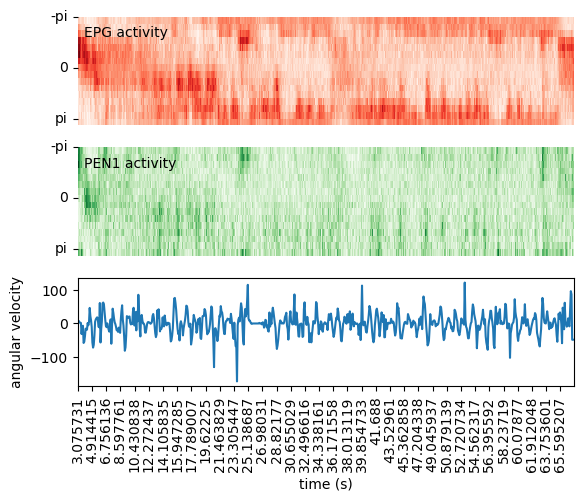

In [28]:
GROIs = [g for g in DF.columns if 'Green' in g]
RROIs = [r for r in DF.columns if 'Red' in r]

fig, axs = plt.subplots(nrows = 3, sharex = True)

sns.heatmap(DF[['t'] + RROIs].set_index('t').T,
            cmap = 'Reds', ax = axs[0], cbar = False)
axs[0].text(10,3,'EPG activity')

sns.heatmap(DF[['t'] + GROIs].set_index('t').T,
            cmap = 'Greens', ax = axs[1], cbar = False)
axs[1].text(10,3,'PEN1 activity')

for i in range(2):
    axs[i].set_yticks([0,7.5,15])
    axs[i].set_yticklabels(['-pi','0','pi'])
    axs[i].get_xaxis().set_visible(False)
    
sns.lineplot(data = DF, x = 'index', y = 'angular velocity')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
axs[2].set_xlabel('time (s)')